# Proyecto Rifeco GG: Clasificación de jugadores por liga.
### Data Mining 2021 UTFSM
#### Integrantes:
* Matías Concha 201530017-8
* Jorge Fernández 2015 xd
* María Fernanda Rivas 201584033-4

## Introducción

### Objetivo
El objetivo de este proyecto es poder clasificar de manera correcta las ligas de los jugadores en LAS que es la región de america del sur y asi, poder saber si los puntajes obtenidos por los jugadores en sus partidas son suficiente para poder clasificarlos desde la mejor liga hasta la peor liga.
Además también se compararán 2 regiones importantes en el juego, las cuales son Corea y Brasil para saber si es posible clasificar por región y si los jugadores de estas regiones tienen puntajes demasiado distinto entre ellos.

# Bibliotecas

In [183]:
# Python basic libraries
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [158]:
# Data Preprocessing libraries

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# metris for classifiers evaluation
from sklearn import metrics

In [159]:
# Classifiers

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# Gaussian process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Adquisición de datos

In [160]:
# Reading the data
# df = pd.read_csv('la2_rankIIIonly_extended.csv')
df = pd.read_csv('csv/la2_50matchs.csv')
df.describe()

,gameId,wins,losses,championId,spell1Id,spell2Id,kills,deaths,assists,largestKillingSpree,...,totalMinionsKilled,goldEarned,goldSpent,visionScore,team-towerKills,team-inhibitorKills,team-baronKills,team-dragonKills,team-vilemawKills,team-riftHeraldKills
count,1.182920e+05,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,...,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.0,118292.000000
mean,1.038999e+09,84.462660,83.969863,150.837926,9.715205,10.848020,6.568196,6.515166,9.274414,2.776621,...,90.415277,11207.835475,10226.299843,18.704359,4.836853,0.904719,0.332609,1.629916,0.0,0.629890
std,3.559839e+07,102.635851,97.707496,181.910544,10.872346,11.287127,5.421333,3.700414,7.390260,2.761656,...,68.023163,4344.813449,4222.167591,17.389994,3.651228,1.169749,0.586446,1.483679,0.0,0.730798
min,7.230876e+08,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.033424e+09,14.000000,18.000000,40.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,...,32.000000,8260.000000,7430.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.053863e+09,48.000000,50.000000,89.000000,4.000000,7.000000,5.000000,6.000000,8.000000,2.000000,...,74.000000,10946.000000,9975.000000,16.000000,4.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,1.059435e+09,112.000000,111.000000,164.000000,12.000000,14.000000,9.000000,9.000000,13.000000,4.000000,...,142.000000,13843.000000,12750.000000,26.000000,8.000000,2.000000,1.000000,3.000000,0.0,1.000000
max,1.063092e+09,829.000000,844.000000,887.000000,54.000000,54.000000,69.000000,52.000000,73.000000,69.000000,...,443.000000,39981.000000,63620.000000,190.000000,11.000000,13.000000,4.000000,8.000000,0.0,2.000000


In [161]:
# Review missing data
print((any(df.isnull().sum()) > 0))
df.dropna(inplace=True)


False


# Selección de datos útiles
## Para la matriz de datos de análisis 'X' se seleccionan todos los datos excepto los siguientes: 
* **tier**: Liga, dado que nuestra variable objetivo
* **rank**: Dado que es una variable que subdivide las ligas, no es de interés para este caso.
* **tierRank**: Fusión de las dos variables anteriores.
* **summonerName**: Nombre del jugador, irrelevante.
* **lane**: Posición del jugador en el mapa del juego al inicio del juego, irrelevante.
* **role**: Rol del jugador durante el juego, irrelevante.
## Estos se descartan debido a que no entregan información relevante en la partida de los jugadores.

In [162]:
X = df.drop([
    'tier', 'rank', 'tierRank', 'region', 'summonerName', 'lane', 'role', 'championId', 'gameId', 'spell1Id', 'spell2Id'], axis=1).values
X_columns = df.drop([
    'tier', 'rank', 'tierRank', 'region', 'summonerName', 'lane', 'role', 'championId', 'gameId', 'spell1Id', 'spell2Id'], axis=1).columns
y = df[['tier']].to_numpy().ravel()

In [163]:
# encoding categorical data e.g. tier as a dummy variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# encoding categorical data e.g. tier as a dummy variable
y,class_names = pd.factorize(y)

In [164]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [165]:
names = [
            # "Nearest Neighbors",
            # "SVM Linear",
            # "SVM rbf",
            # "GP",
            " Decision Tree ",
            " Random Forest ",
            # "Neural Net", 
            "== Ada Boost ==",
            # "Naive Bayes",
            "===== QDA ====="
        ]        
        
classifiers = [
    # KNeighborsClassifier(500),
    # SVC(kernel="linear", C=0.03, probability = True),
    # SVC(gamma=1.5, C=1, probability = True),
    # GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=3),
    RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=100, random_state=3),
    # MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    # GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]

In [166]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [167]:
i=1
fitted_clfs=[]
for name, clf in zip(names, classifiers):
        # fit the model using the training set
        fitted_clfs.append(clf.fit(X_train, y_train))   

C:\Users\matia\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [168]:
for name, clf in zip(names, fitted_clfs):
        y_pred = clf.predict(X_train)
        y_pred_labeled, y_train_labeled = class_names[y_pred], class_names[y_train]
        print('========================'+ name + '========================')
        print("Confusion matrix:")
        print(pd.crosstab(y_train_labeled, y_pred_labeled, rownames=['Actual'], colnames=['Predicted']))
        print("Classification report:")
        print(classification_report(y_train, y_pred, target_names=class_names))
        print('===============================================================\n')
        print(' ')
        i += 1

======================== Decision Tree ========================
Confusion matrix:
Predicted  BRONZE  DIAMOND   GOLD   IRON  PLATINUM  SILVER
Actual                                                    
BRONZE      14431        4     32    132        69      89
DIAMOND        21    14427    162      0        37     125
GOLD          101       28  14684     19        15      38
IRON           52        0      0  14791         7      13
PLATINUM       89        4    163     16     14400     138
SILVER         98       10     14     44       141   14325
Classification report:
              precision    recall  f1-score   support

        IRON       0.99      1.00      0.99     14863
      BRONZE       0.98      0.98      0.98     14757
      SILVER       0.97      0.98      0.98     14632
        GOLD       0.98      0.99      0.98     14885
    PLATINUM       0.98      0.97      0.98     14810
     DIAMOND       1.00      0.98      0.99     14772

    accuracy                           0.98

In [169]:
for name, clf in zip(names, fitted_clfs):
        y_pred = clf.predict(X_test)
        y_pred_labeled, y_test_labeled = class_names[y_pred], class_names[y_test]
        print('========================'+ name + '========================')
        print("Confusion matrix:")
        print(pd.crosstab(y_test_labeled, y_pred_labeled, rownames=['Actual'], colnames=['Predicted']))
        print("Classification report:")
        print(classification_report(y_test, y_pred, target_names=class_names))
        print('===============================================================\n')
        print(' ')
        i += 1

======================== Decision Tree ========================
Confusion matrix:
Predicted  BRONZE  DIAMOND  GOLD  IRON  PLATINUM  SILVER
Actual                                                  
BRONZE       4226       15   109   307        87     175
DIAMOND        30     4676    79     2        35     102
GOLD          140       46  4562    40        55     119
IRON          302        2    57  4410        52     131
PLATINUM      119       29    91    39      4538     121
SILVER        147       38   103   153       115    4321
Classification report:
              precision    recall  f1-score   support

        IRON       0.89      0.89      0.89      4954
      BRONZE       0.85      0.86      0.86      4919
      SILVER       0.87      0.89      0.88      4877
        GOLD       0.91      0.92      0.92      4962
    PLATINUM       0.93      0.92      0.92      4937
     DIAMOND       0.97      0.95      0.96      4924

    accuracy                           0.90     29573
   ma

In [181]:
for name, clf in zip(names, fitted_clfs):
        try:
                y_pred = clf.predict(X_test)
                y_pred_labeled, y_test_labeled = class_names[y_pred], class_names[y_test]
                print(name)
                feat_datas = sorted(list(zip(X_columns, clf.feature_importances_)), key=lambda x: x[1], reverse=True)[:6]
                for feat_data in feat_datas:
                        print(feat_data)
                print(' ')
        except:
                print('N/A')


 Decision Tree 
('wins', 0.40529110713855115)
('losses', 0.3637391739255815)
('spell2Id', 0.051312520033374893)
('spell1Id', 0.05128193702823836)
('visionScore', 0.023714728695991973)
('totalMinionsKilled', 0.01583341754521489)
 
 Random Forest 
('wins', 0.14644438052374215)
('losses', 0.10807669113956951)
('totalMinionsKilled', 0.049423571101252596)
('totalDamageDealt', 0.04347091618634837)
('totalDamageDealtToChampions', 0.0430610110028093)
('totalHeal', 0.042633335050178106)
 
== Ada Boost ==
('wins', 0.48)
('losses', 0.36)
('visionScore', 0.04)
('spell1Id', 0.02)
('spell2Id', 0.02)
('deaths', 0.02)
 
===== QDA =====
N/A


# Conclusiones sobre la clasificación.

Como conclusiónes podemos determinar que los datos entregados por la API de Riot Games son suficientes para poder clasificar al jugador con respecto a su liga con Machine Learning, esto se debe que a nivel de estadísticas de cada partida, los jugadores de ligas más altas toman distintas decisiones y cumplen diferentes objetivos, siendo estos criterios de clasificación útiles.

En estos primeros resultados se puede apreciar que el clasificador que mejor funciona es Decision Tree, esto se podría deber a que el dataset a clasificar es lo suficientemente obvio como para que Decision Tree, al ser un modelo de clasificación simple, tiene mejores resultados que Random Forest, el cual combina aleatoriamente árboles de decisión, complejizando el problema y pudiendo darle mayor importancia a parámetros que no ayuden a tener una buena clasificación.

Seguidamente, el 2do mejor es Random Forest, que como se menciona previamente, sigue siendo un buen modelo para clasificar a los jugadores, aunque no consgue tener tanta precisión como Decision Tree.

Se hicieron diferentes pruebas cambiando los parametros de los clasificadores, se hizo variar el random_state para asegurarnos que los buenos resultados de Decision Tree no eran solo por suerte.

Los demás clasificadores tienen resultados insuficientes a nivel de exactitud y precisión.

### Por todo lo anterior, se concluye que **Decision Tree** es el mejor clasificador para el problema planteado.

# Aplicación práctica

En esta sección lo que se busca es poder ejemplificar una apliación práctica del modelo obtenido, con el objetivo de poder indicarle a un jugador de cierta liga, qué es lo que necesita mejorar para poder alcanzar una liga objetivo. En este caso, compararemos a un jugador del a liga IRON (la más baja), con la liga DIAMOND (la liga más alta dentro del dataset).

In [233]:
mean_IRON = df[df['tier'] == 'IRON'].mean()
mean_DIAMOND = df[df['tier'] == 'DIAMOND'].mean()
mean_PLAYER = df[df['summonerName'] == 'PaposDelCente'].mean()
print(mean_DIAMOND-mean_IRON)

gameId                         3.661765e+07
wins                           1.469044e+02
losses                         1.200991e+02
win                            9.857013e-02
championId                     2.455153e+01
spell1Id                       1.896887e+00
spell2Id                       2.156697e+00
kills                          2.172300e+00
deaths                        -7.770427e-01
assists                        1.643280e+00
largestKillingSpree            1.079154e+00
largestMultiKill               3.290118e-01
killingSprees                  5.499030e-01
longestTimeSpentLiving         1.110833e+01
doubleKills                    4.173935e-01
tripleKills                    9.890116e-02
quadraKills                    1.917542e-02
pentaKills                     3.573241e-03
totalDamageDealt               2.883763e+04
totalDamageDealtToChampions    6.279218e+03
totalHeal                      1.744373e+03
totalUnitsHealed               1.854219e-01
damageDealtToObjectives        2

In [234]:
print(mean_DIAMOND-mean_PLAYER)

gameId                         8.153858e+07
wins                           1.687980e+02
losses                         1.495607e+02
win                            1.319354e-01
championId                     2.402109e+01
spell1Id                       6.500863e+00
spell2Id                      -2.256080e+00
kills                          7.331560e-01
deaths                        -3.442776e+00
assists                        3.095085e-01
largestKillingSpree            8.867384e-01
largestMultiKill               7.047116e-02
killingSprees                  9.480097e-03
longestTimeSpentLiving         7.534491e+01
doubleKills                    1.648538e-01
tripleKills                    1.129285e-01
quadraKills                    3.305240e-02
pentaKills                     6.701868e-03
totalDamageDealt               2.929686e+04
totalDamageDealtToChampions    3.646020e+03
totalHeal                      3.037373e+02
totalUnitsHealed               4.375731e-01
damageDealtToObjectives        1

## Análisis de datos promedio

Se obtuvo la media para poder saber los valores numéricos que el jugador debe aumentar o disminuir con la finalidad de subir de liga.

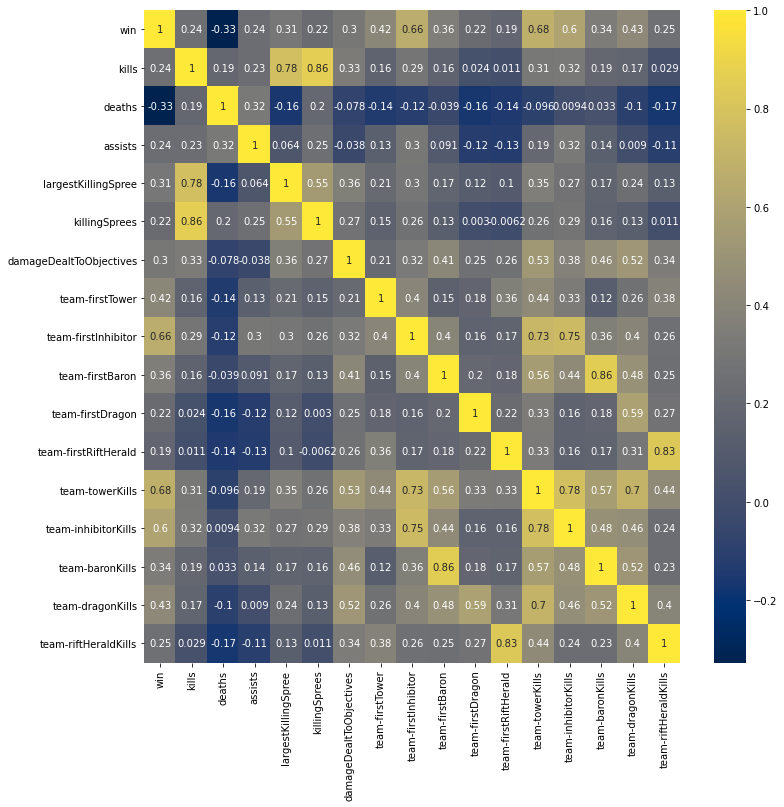

In [235]:
corrmat_IRON = df[df['tier'] == 'IRON'].corr()
top_corr_features = corrmat_IRON.index[abs(corrmat_IRON["win"]) > 0.20]

plt.figure(figsize = (12,12))
ax = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="cividis")
plt.show()

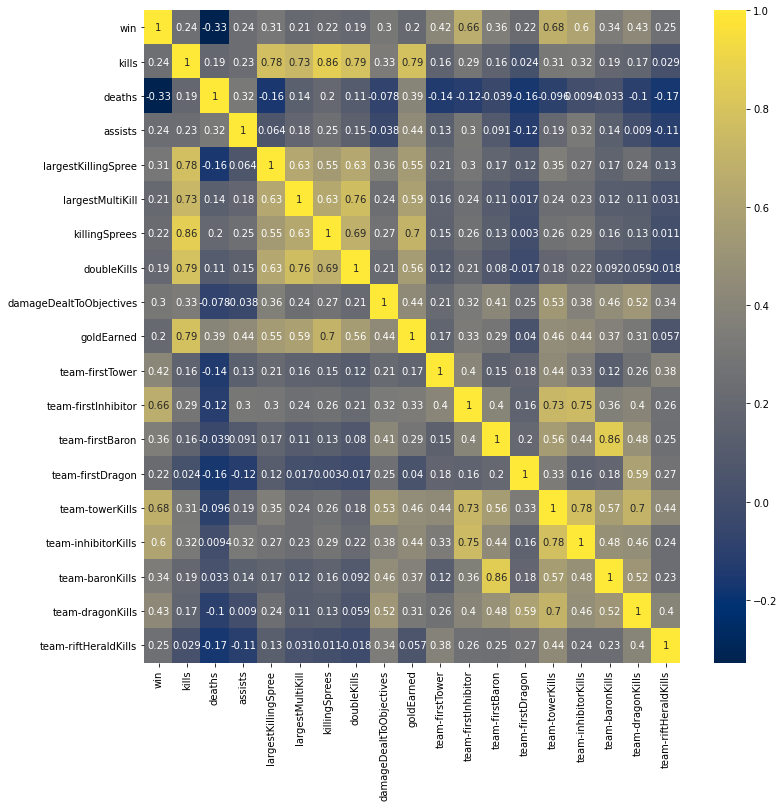

In [236]:
corrmat_DIAMOND = df[df['tier'] == 'DIAMOND'].corr()
top_corr_features = corrmat_DIAMOND.index[abs(corrmat_DIAMOND["win"]) > 0.20]

plt.figure(figsize = (12,12))
ax = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="cividis")
plt.show()

## Análisis de aplicación de características importantes.

Si bien es importante tener en cuenta cuánto mejorar cada aspecto del juego, también es necesario priorizar cuáles mejorar primero y cuáles después. De la sección anterior, cada clasificador entregó una lista de características importantes para saber clasificar a cada jugador en su liga, dado que Decision Tree obtuvo una exactitud sobre el 90%, se puede asumir que su criterio es un buen indicador para realizar la priorización de mejora.

Por ejemplo, los parámetros de VisionScore y TotalMinionsKilled, son de bastante relevancia, por lo que  el jugador "PaposDelCente" debe aumentar los Minions totales que asesina en 57 puntos en promedio y su puntuación de visión la debe mantener.

*Nota*: Wins y losses tienen la mayor importancia, lo cual es obvio, dado que para ser de altas ligas, más victorias y menos derrotas debe tener el jugador. 

In [173]:
# # Visualize the tree by graphiz
# import graphviz
# from sklearn import tree
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Users/matia/anaconda3/Library/bin/graphviz/'
# feature_names = X_columns
# dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
# graph = graphviz.Source(dot_data)
# graph